# Trabalho 2 - Python + MongoDB
-----
O objetivo deste trabalho é exercitar a utilização de banco de dados noSQL e manipulação de dados em Python. O dataset que será utilizado é o dataset de Comunicação de Acidentes do Trabalho, disponível no portal de dados aberto do Brasil: http://dados.gov.br
O dataset original completo é composto por 3 trimestres de comunicação de acidentes de trabalho (Jul-Set 2018, Out-Dez 2018 e Jan-Mar 2019). Cada dupla, em sua área Oracle, tem acesso a um recorte deste dataset, com até 29.000 instâncias, aproximadamente. Além disso, o dataset foi enriquecido com dados de populações das respectivas cidades dos correspondentes empregadores (não, não tem a cidade onde ocorreu o acidente de trabalho; somente o estado).

Abaixo, você encontra o passo a passo que deve ser seguido para realização do trabalho.


## 1 - Exportar os dados do Oracle
Você deve construir uma consulta que faça a junção entre os acidentes de trabalho disponíveis ao grupo e as populações dos municípios que aparecem no dataset, e exportar o resultados para `csv`. Ao exportar, definir delimitadores para não numéricos (", por exemplo) e a codificação adequada ('cp1252' é adequada).


## 2 - Ler o dataset e inserir no MongoDB

Você deve ler o dataset exportado no passo anterior, transformar os dados em formato de documento e fazer upload para a coleção do seu grupo no mongoDB. O nome da coleção é `dupla_x_collection`. O seu usário do MongoDB é `dupla_x`. A senha você deve ter recebido no moodle. Caso não saiba a sua senha de acesso, pergunte aos professores. **x** é o número da sua dupla! 

Para conectar no MongoDB a partir do python, você pode utilizar o código abaixo:

```python
from pymongo import MongoClient
user = 'dupla_x' # coloque o número da sua dupla aqui!
pwd = 'senhaDaSuaDupla' # coloque a senha da sua dupla aqui!
client = MongoClient('mongodb://{}:{}@ds151066.mlab.com:51066/datascience'.format(user, pwd))
db = client.datascience

# exemplo de consulta de documentos
cursor = db.dupla_x_collection.find() # x é o numero da sua dupla!!
```
O espaço alocado no MongoDB (MLAB), para cada grupo, é suficiente para a carga do `csv`. 


## 2 - Responder as seguintes perguntas utilizando consultas ao MongoDB

A dupla deve responder as seguintes perguntas, utilizando apenas consultas ao banco de dados.

1. Quais os 10 municípios com maior taxa de acidentes por 100 mil habitantes?
2. Quais as Naturezas das lesões, e correspondentes números de acidentes de trabalho, para naturezas de lesões cujo número de acidentes de trabalho é > 100?
3. Quais os agentes causadores de acidentes, e correspondentes números de acidentes, por mês-ano e para acidentes com óbitos, onde o número de óbitos por agente causador é > 2?

Dica: usem aggregate da API do MongoDB. Vejam mais informações em: 
https://docs.mongodb.com/manual/reference/method/db.collection.aggregate/
e
https://docs.mongodb.com/manual/reference/operator/aggregation-pipeline/


## 3 - Responder as seguintes perguntas utilizando Python (Pandas, Numpy e Matplotlib)

1. Quais os 10 municípios que mais possuem acidentes de trabalho? Faça um gráfico de barras para apresentar o resultado.
2. Quais os 10 municípios que mais possuem acidentes de trabalho por 100 mil habitantes? Faça um gráfico de barras para apresentar o resultado.
3. Qual a proporção de acidentes de trabalho em relação a cada estado? Faça um gráfico de pizza para mostrar o resultado.
4. Qual a natureza da lesão mais comum nos acidentes?
5. Qual é o comportamento do número de acidentes ao longo do tempo? Mostre a evolução do número de acientes utilizando um gráfico de linha.
 


## Entrega
A dupla deve entregar, **no moodle da disciplina de Banco de Dados Relacionais e Não Relacionais**, um **arquivo zip** com o seguinte nome: `dupla_x.zip`, onde **x** é o número da sua dupla. O arquivo `zip` deve conter os seguintes arquivos:
* Um relatório em `pdf` contendo a definição da visão definida no Oracle, e os resultados obtidos nas consultas sobre o MongoDB via MLAB.
* Este jupyter notebook contendo o código desenvolvido pela dupla.
* O dataset em `csv` exportado do Oracle.

<h3 style='color:red'>IMPORTANTE: A data de entrega do trabalho é 23/05.</h3>


## Critérios de avaliação

#### Critérios de avaliação da disciplina de Banco de Dados Relacionais e Não Relacionais
- Visão adequada para exportação, contendo a junção do recorte de dados de acidentes de trabalho e as populações dos municípios: 15%
- Arquivo `csv` exportado, com o conteúdo adequado: 10%
- Resolução das consultas propostas: 75% (25% para cada uma)


#### Critérios de avaliação da disciplina de Python Para Ciência de Dados
A nota deste trabalho equivale ao **Trabalho 2 (T2)** da disciplinina de de Python Para Ciência de Dados. A pontuação será calculada sobre as questões mostradas no **item 3**, cada questão vale **2 pontos** e será avaliada de acordo com os seguintes critérios:

- Resolver o problema proposto: 70%
- Utilizar código vetorizado: 20%
- Escrever código simples e legível: 10%

### O seu código deve ser escrito nas células abaixo. Crie novas células conforme a necesidade de abstração. Evite escrever o código inteiro em uma única célula.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
from IPython.display import display as print_dataframe

In [205]:
from pymongo import MongoClient
user = 'dupla_7' # coloque o número da sua dupla aqui!
pwd = '3b4e55kc' # coloque a senha da sua dupla aqui!
client = MongoClient('mongodb://{}:{}@ds151066.mlab.com:51066/datascience'.format(user, pwd))
db = client.datascience
coll = db['dupla_7_collection']
data = pd.read_csv('export.csv', encoding = "cp1252")
# print(data.head())

In [223]:
#Cria o dataset no mongo db

#coll.delete_many({})
#coll.insert_many(data.to_dict('records'), ordered=False)

#Conta os valores
#counter = coll.find().count()
#print(counter)


In [179]:
#Questão 2.1
#Quais os 10 municípios com maior taxa de acidentes por 100 mil habitantes?

pipeline = [
    {"$group": {"_id": {"NOME_MUNICÍPIO": "$MUNICÍPIO", "UF_MUNIC_EMPREGADOR": "$UF_MUNIC_EMPREGADOR"}, 
                "count": {"$sum": 1}, "populacao": {"$avg": "$POPULAÇÃO"}}},
    {"$project": 
       {
           "_id": 0,
           "nome_municipio": "$_id.NOME_MUNICÍPIO",
           "nome_estado": "$_id.UF_MUNIC_EMPREGADOR",
           "taxa":{"$divide":["$count",{"$divide":["$populacao",100000]}]}
       }
    },    
    {"$sort": {"taxa": -1} },
    {"$limit": 10 }    
]
list(coll.aggregate(pipeline))

[{'nome_municipio': 'Rio Formoso',
  'nome_estado': 'Pernambuco',
  'taxa': 853.2423208191126},
 {'nome_municipio': 'Eusébio',
  'nome_estado': 'Ceará',
  'taxa': 516.2632375189107},
 {'nome_municipio': 'Camutanga',
  'nome_estado': 'Pernambuco',
  'taxa': 515.8264947245018},
 {'nome_municipio': 'Baía Formosa',
  'nome_estado': 'Rio Grande do Norte',
  'taxa': 509.87198958559344},
 {'nome_municipio': 'Laranjeiras',
  'nome_estado': 'Sergipe',
  'taxa': 344.97919978354247},
 {'nome_municipio': 'Pereiro',
  'nome_estado': 'Ceará',
  'taxa': 343.9592162643572},
 {'nome_municipio': 'São Miguel dos Campos',
  'nome_estado': 'Alagoas',
  'taxa': 306.0468942821884},
 {'nome_municipio': 'Igreja Nova',
  'nome_estado': 'Alagoas',
  'taxa': 299.0822681088168},
 {'nome_municipio': 'Horizonte',
  'nome_estado': 'Ceará',
  'taxa': 288.8949390446804},
 {'nome_municipio': 'Maracanaú',
  'nome_estado': 'Ceará',
  'taxa': 278.60326894502225}]

In [180]:
#Questão 2.2
#Quais as Naturezas das lesões, e correspondentes números de acidentes de trabalho, 
#para naturezas de lesões cujo número de acidentes de trabalho é > 100?

pipeline = [
    {"$group": {"_id": "$NATUREZA_DA_LESAO", 
                "count": {"$sum": 1}}},
    {"$match": { "count": { "$gt": 100 }}},
    {"$sort": {"count": -1} },
    {"$project": 
       {
           "_id": 0,
           "count": "$count",
           "natureza_da_lesao": "$_id"
           
       }
    },
]
list(coll.aggregate(pipeline))


[{'count': 4465, 'natureza_da_lesao': 'Corte, Laceracao, Fe'},
 {'count': 4060, 'natureza_da_lesao': 'Fratura'},
 {'count': 2722, 'natureza_da_lesao': 'Contusao, Esmagament'},
 {'count': 2504, 'natureza_da_lesao': 'Lesao Imediata, Nic'},
 {'count': 2065, 'natureza_da_lesao': 'Distensao, Torcao'},
 {'count': 1938, 'natureza_da_lesao': 'Escoriacao, Abrasao'},
 {'count': 1095, 'natureza_da_lesao': 'Luxacao'},
 {'count': 601, 'natureza_da_lesao': 'Lesao Imediata'},
 {'count': 598, 'natureza_da_lesao': 'Queimadura ou Escald'},
 {'count': 541, 'natureza_da_lesao': 'Lesoes Multiplas'},
 {'count': 534, 'natureza_da_lesao': 'Doenca, Nic'},
 {'count': 416, 'natureza_da_lesao': 'Inflamacao de Articu'},
 {'count': 180, 'natureza_da_lesao': 'Perda ou Diminuicao'},
 {'count': 174, 'natureza_da_lesao': 'Amputacao ou Enuclea'},
 {'count': 122, 'natureza_da_lesao': 'Queimadura Quimica ('}]

In [182]:
#Questão 2.3
#Quais os agentes causadores de acidentes, e correspondentes números de acidentes, 
#por mês-ano e para acidentes com óbitos, onde o número de óbitos por agente causador é > 2?

pipeline = [
    {"$match": { "INDICA_OBITO_ACIDENTE": "Sim"}},
    {"$group": {"_id": {"AGENTE_CAUSADOR_ACIDENTE": "$AGENTE_CAUSADOR_ACIDENTE", 
                        "MES_ANO_ACIDENTE": "$MES_ANO_ACIDENTE"}, 
                "count": {"$sum": 1}}},
    {"$match": { "count": { "$gt": 2 }}},
    {"$sort": {"count": -1} },
    {"$project": 
       {
           "_id": 0,
           "count": "$count",
           "AGENTE_CAUSADOR_ACIDENTE": "$_id.AGENTE_CAUSADOR_ACIDENTE",
           "MES_ANO_ACIDENTE": "$_id.MES_ANO_ACIDENTE"           
       }
    }
]
list(coll.aggregate(pipeline))


[{'count': 6,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo Rodoviario M',
  'MES_ANO_ACIDENTE': '01-FEB-19'},
 {'count': 6,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo Rodoviario M',
  'MES_ANO_ACIDENTE': '01-SEP-18'},
 {'count': 5,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo, Nic',
  'MES_ANO_ACIDENTE': '01-AUG-18'},
 {'count': 4,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo Rodoviario M',
  'MES_ANO_ACIDENTE': '01-AUG-18'},
 {'count': 4,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo Rodoviario M',
  'MES_ANO_ACIDENTE': '01-OCT-18'},
 {'count': 4,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo Rodoviario M',
  'MES_ANO_ACIDENTE': '01-JAN-19'},
 {'count': 3,
  'AGENTE_CAUSADOR_ACIDENTE': 'Motocicleta, Motonet',
  'MES_ANO_ACIDENTE': '01-OCT-18'},
 {'count': 3,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo Rodoviario M',
  'MES_ANO_ACIDENTE': '01-DEC-18'},
 {'count': 3,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo, Nic        ',
  'MES_ANO_ACIDENTE': '01-MAR-19'},
 {'count': 3,
  'AGENTE_CAUSADOR_ACIDENTE': 'Veiculo, Nic        ',
  'M

MUNICÍPIO                UF_MUNIC_EMPREGADOR
Fortaleza                Ceará                  3882
Recife                   Pernambuco             3129
Natal                    Rio Grande do Norte    1570
Maceió                   Alagoas                1126
Aracaju                  Sergipe                 877
João Pessoa              Paraíba                 847
Maracanaú                Ceará                   630
Jaboatão dos Guararapes  Pernambuco              597
Campina Grande           Paraíba                 445
Petrolina                Pernambuco              439
Name: MUNICÍPIO, dtype: int64

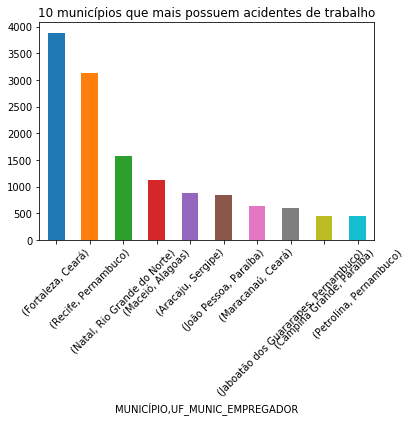

In [183]:
#Questão 3.1
#Quais os 10 municípios que mais possuem acidentes de trabalho? 
#Faça um gráfico de barras para apresentar o resultado.

municipio_acid = data.groupby(["MUNICÍPIO", "UF_MUNIC_EMPREGADOR"])["MUNICÍPIO"].count().sort_values(ascending=False)[:10]
print_dataframe(municipio_acid)
municipio_acid.plot.bar()
plt.title('10 municípios que mais possuem acidentes de trabalho')
plt.xticks(rotation=45)
plt.show()


,MUNICÍPIO,UF_MUNIC_EMPREGADOR,TAXA
325,Rio Formoso,Pernambuco,853.242321
130,Eusébio,Ceará,516.263238
85,Camutanga,Pernambuco,515.826495
49,Baía Formosa,Rio Grande do Norte,509.871990
220,Laranjeiras,Sergipe,344.979200
293,Pereiro,Ceará,343.959216
385,São Miguel dos Campos,Alagoas,306.046894
163,Igreja Nova,Alagoas,299.082268
157,Horizonte,Ceará,288.894939
229,Maracanaú,Ceará,278.603269


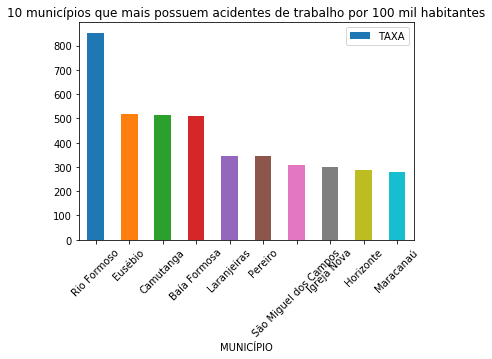

In [184]:
#Questão 3.2
#Quais os 10 municípios que mais possuem acidentes de trabalho por 100 mil habitantes? 
#Faça um gráfico de barras para apresentar o resultado.

def calculateTaxa(row):
    row["TAXA"] = row["COUNT"] / (row["POPULAÇÃO"]/100000)    
    return row

municipio_group = data.groupby(["MUNICÍPIO", "UF_MUNIC_EMPREGADOR", "POPULAÇÃO"])
municipio_by_100 = municipio_group.size().reset_index(name = "COUNT").apply(calculateTaxa, axis=1)
municipio_by_100 = municipio_by_100[["MUNICÍPIO", "UF_MUNIC_EMPREGADOR", "TAXA"]].sort_values(by="TAXA",ascending=False)[:10]
print_dataframe(municipio_by_100)
municipio_by_100.plot.bar(x="MUNICÍPIO", y='TAXA', rot=45)
plt.title('10 municípios que mais possuem acidentes de trabalho por 100 mil habitantes')
plt.show()




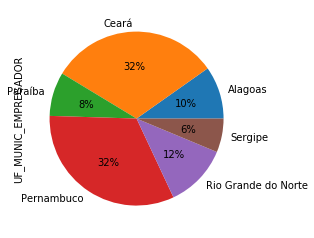

In [185]:
#Questão 3.3
#Qual a proporção de acidentes de trabalho em relação a cada estado? 
#Faça um gráfico de pizza para mostrar o resultado.


estado_acid = data.groupby(["UF_MUNIC_EMPREGADOR"])["UF_MUNIC_EMPREGADOR"].count()
estado_acid.plot.pie(autopct='%1.0f%%')
plt.show()





In [203]:
#Questão 3.4
#Qual a natureza da lesão mais comum nos acidentes?

natureza_da_lesao_top = data.groupby(["NATUREZA_DA_LESAO"]).size().reset_index(name = "COUNT").sort_values(by="COUNT", ascending=False)[:1]
print_dataframe(natureza_da_lesao_top)

,NATUREZA_DA_LESAO,COUNT
6,"Corte, Laceracao, Fe",4465


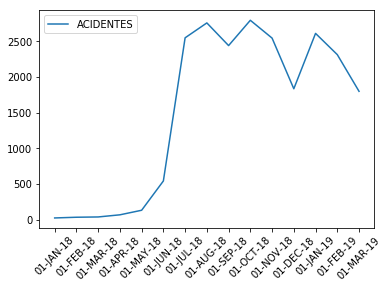

In [204]:
#Questão 3.5
#Qual é o comportamento do número de acidentes ao longo do tempo? 
#Mostre a evolução do número de acientes utilizando um gráfico de linha.

data_order = ["01-JAN-18", "01-FEB-18", "01-MAR-18", "01-APR-18", "01-MAY-18", "01-JUN-18", "01-JUL-18", "01-AUG-18", "01-SEP-18", "01-OCT-18", "01-NOV-18", "01-DEC-18", "01-JAN-19", "01-FEB-19", "01-MAR-19"]
data_acid = data.groupby(["MES_ANO_ACIDENTE"]).size().reset_index(name = "ACIDENTES")

#Para ordenar a coluna pela lista
data_acid.set_index("MES_ANO_ACIDENTE", inplace=True)
data_acid = data_acid.loc[data_order, :]

#Este passo é para evitar um bug do windows que não mostra o valor do index de um gráfico de linha com label do eixo x
data_acid = data_acid.reset_index()
data_acid = data_acid.rename(columns={"index":"MES_ANO_ACIDENTE"})
ax = data_acid.plot.line(xticks=data_acid.index)
ax.set_xticklabels(data_acid["MES_ANO_ACIDENTE"])

plt.xticks(rotation=45)
plt.show()
